In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [4]:
anemia = pd.read_csv(r"C:\Users\user\Downloads\children anemia.csv\children anemia.csv")

anemia

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33919,35-39,Rural,Secondary,Richer,2,19,120.0,Not anemic,Yes,No,Married,Living with her,NaN,No,120.0,Not anemic,Yes
33920,25-29,Rural,No education,Richer,1,27,120.0,Not anemic,Yes,No,Never in union,NaN,Hours: 1,No,120.0,Not anemic,No
33921,25-29,Rural,Higher,Richer,1,22,149.0,Not anemic,Yes,No,Married,Living with her,Hours: 1,No,119.0,Not anemic,No
33922,20-24,Rural,Secondary,Richer,1,21,123.0,Not anemic,Yes,No,Married,Living with her,Immediately,No,75.0,Moderate,Yes


In [5]:
#drop anemia level column

anemia= anemia.drop(["Anemia level"], axis=1)

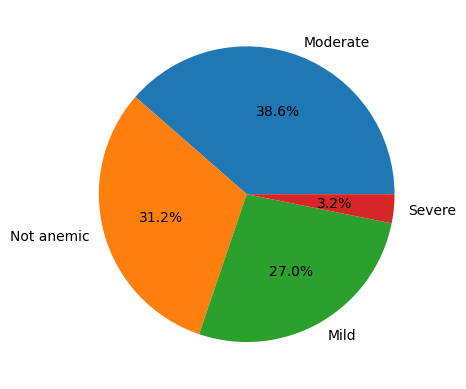

In [6]:
#pie plot to show distribution of the different anemic levels - you can choose to use a bar
#plot them to one decimal place, using autopct to display as percentages

plt.pie(anemia["Anemia level.1"].value_counts().values, labels=anemia["Anemia level.1"].value_counts().index, autopct="%1.1f%%")

plt.show()

In [7]:
anemia.shape

(33924, 16)

# Data Cleaning

In [6]:
#investigate total missing values in each column
anemia.isna().sum()

Age in 5-year groups                                                         0
Type of place of residence                                                   0
Highest educational level                                                    0
Wealth index combined                                                        0
Births in last five years                                                    0
Age of respondent at 1st birth                                               0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    20788
Have mosquito bed net for sleeping (from household questionnaire)            0
Smokes cigarettes                                                            0
Current marital status                                                       0
Currently residing with husband/partner                                   1698
When child put to breast                                                 12756
Had fever in last two weeks                         

In [8]:
#Fill missing values with mean or otherwise unknown

anemia['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'] = anemia['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].fillna(anemia['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].mean())
anemia['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'] = anemia['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].fillna(anemia['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].mean())
anemia['When child put to breast'] = anemia['When child put to breast'].fillna("Unknown")


In [9]:
#using boolean mask(not NA) to include rows populated with data only in the respective columns

anemia = anemia[anemia["Anemia level.1"].notna()]
anemia = anemia[anemia["Currently residing with husband/partner"].notna()]

In [10]:
#reset the dataframe index, original might have missing consecutive indices after cleaning
#drop the original index
anemia = anemia.reset_index(drop=True)

In [11]:
anemia.isna().sum()

#confirmation of cleared missing values

Age in 5-year groups                                                     0
Type of place of residence                                               0
Highest educational level                                                0
Wealth index combined                                                    0
Births in last five years                                                0
Age of respondent at 1st birth                                           0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    0
Have mosquito bed net for sleeping (from household questionnaire)        0
Smokes cigarettes                                                        0
Current marital status                                                   0
Currently residing with husband/partner                                  0
When child put to breast                                                 0
Had fever in last two weeks                                              0
Hemoglobin level adjusted

#  One Hot Encoding


In [12]:
#using pd.get_dummies() to encode categorical values, since ML works with numericals
#spare only the target variable: anemia level
#isinstance function used to check if the column contains categorical(string) variable
#list ToChange intitalizes an empty list to hold the columns with categorical data

listToChange = []
for i in anemia.columns:
    if isinstance(anemia[i][0], str):
        if i != "Anemia level.1" and i != "Anemia level":
            listToChange.append(i)
            
anemia = pd.get_dummies(anemia, columns= listToChange, dtype=int)
    

In [13]:
anemia.shape

(9664, 75)

In [14]:
def addLabels(x, y):
    for i in range(len(y)):
        plt.text(i, y[i], str(y[i]), ha="center")

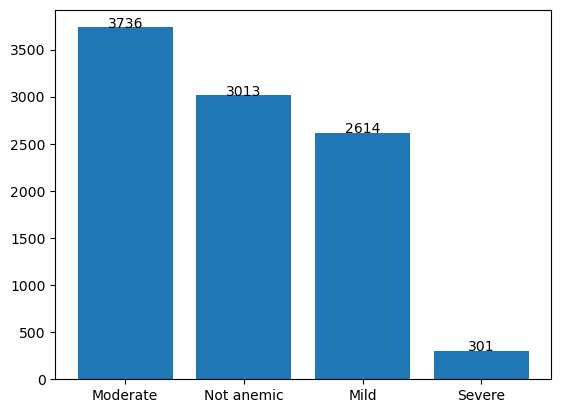

In [15]:
plt.bar(anemia["Anemia level.1"].value_counts().index, anemia["Anemia level.1"].value_counts().values)

addLabels(anemia["Anemia level.1"].value_counts().index, anemia["Anemia level.1"].value_counts().values)

# Model Selection with Default Models

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


In [17]:
X = anemia.drop(["Anemia level.1"], axis=1)
y = pd.DataFrame(anemia["Anemia level.1"])

#df X contains the features only hence dropping the target, while df Y contains the target variable 

In [18]:
#transform target from cat into num variables using labelencoder

le= LabelEncoder()
y["Anemia level.1"] = le.fit_transform(y["Anemia level.1"])

<Axes: >

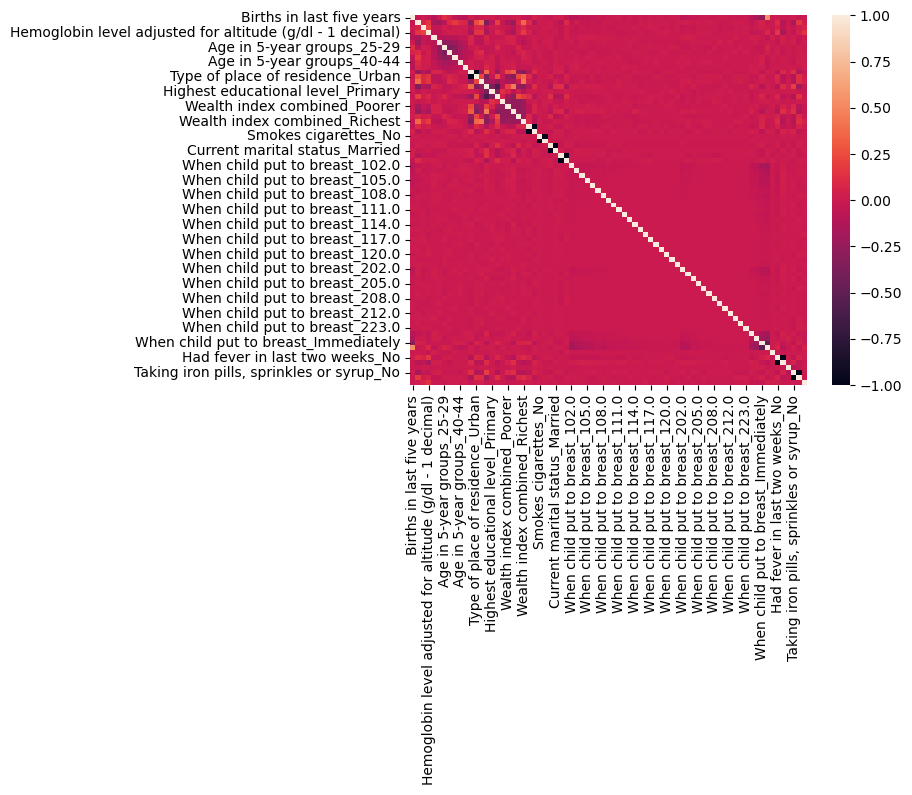

In [19]:
#find correlation between features and target variable

import seaborn as sns
sns.heatmap(pd.concat([X,y], axis=1).corr())

<BarContainer object of 74 artists>

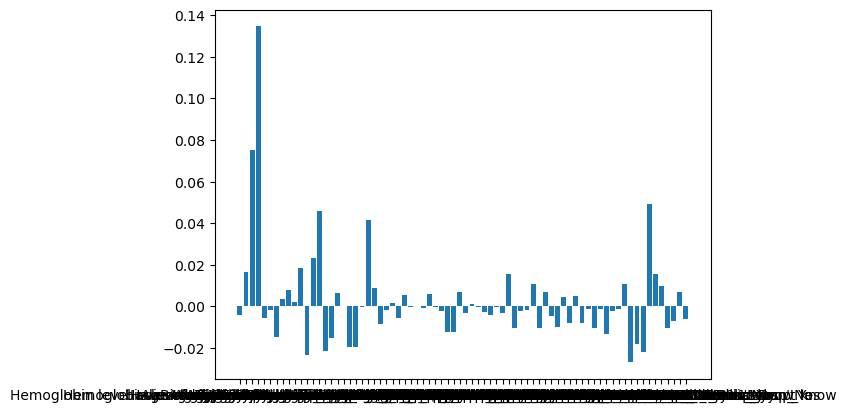

In [20]:
#bar plot to analyse which features have stronger or weaker correlation with the target
plt.bar(pd.concat([X,y], axis=1).corr()['Anemia level.1'].index[:-1], pd.concat([X,y], axis=1).corr()['Anemia level.1'].values[:-1])



In [21]:
# splitting the data into training, validation, and testing sets, you can train your model on the training set, tune hyperparameters on the validation set, and evaluate its performance on the testing set. This helps prevent overfitting of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)

#### KNN Model with default parameters



In [22]:
knn = KNeighborsClassifier()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    knn.fit(X_train, y_train)
    knn_scores =knn.score(X_val, y_val)
    
#evaluates the performance of the trained KNN classifier on the validation data X_val,
#and corresponding target labels y_val



In [23]:
print(knn_scores)
print(confusion_matrix(y_true=y_test, y_pred=knn.predict(X_test)))

0.9754363283775048
[[502  12   6   0]
 [ 13 743   0   0]
 [ 19   0 583   0]
 [  0   7   0  48]]


In [24]:
knn.n_neighbors, knn.weights, knn.algorithm

(5, 'uniform', 'auto')

#### Random Forest Model with Default Parameters


In [27]:
rr =RandomForestClassifier()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    rr.fit(X_train, y_train)
    rr_scores = rr.score(X_val, y_val)
    
print("scores:", rr_scores)   
print("Confusion_matrix:")
print(confusion_matrix(y_true=y_test, y_pred=rr.predict(X_test)))

scores: 0.982546864899806
Confusion_matrix:
[[520   0   0   0]
 [  0 756   0   0]
 [  0   0 602   0]
 [  0  28   0  27]]


In [28]:
rr.n_estimators, rr.criterion

# Gini impurity measures the frequency of misclassification if a random sample were labeled according to the distribution of samples in the node.

(100, 'gini')

 #### Decision tree with default parameters

In [30]:
dt = DecisionTreeClassifier()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    dt.fit(X_train, y_train)
    dt_scores = dt.score(X_val, y_val)
print("Score:", dt_scores)
print("COnfusion matrix:")
print(confusion_matrix(y_true=y_test, y_pred=dt.predict(X_test)))

Score: 1.0
COnfusion matrix:
[[520   0   0   0]
 [  0 756   0   0]
 [  0   0 602   0]
 [  0   0   0  55]]


# Model Selection with Hyperparameter Tuning

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### KNN Model with hyperparameter tuning

In [32]:
KNN_Neighbors = [3, 4, 5, 7, 10, 15]
KNN_Weights = ['uniform', 'distance']
KNN_algos = ['auto', 'ball_tree', 'kd_tree', 'brute']

In [33]:
knn = KNeighborsClassifier()

knn_gs = GridSearchCV(knn, {
    'n_neighbors': KNN_Neighbors,
    'weights': KNN_Weights,
    'algorithm': KNN_algos
}, cv=5, return_train_score=False)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    knn_gs.fit(X_train, y_train)
    knn_scores = pd.DataFrame(knn_gs.cv_results_)

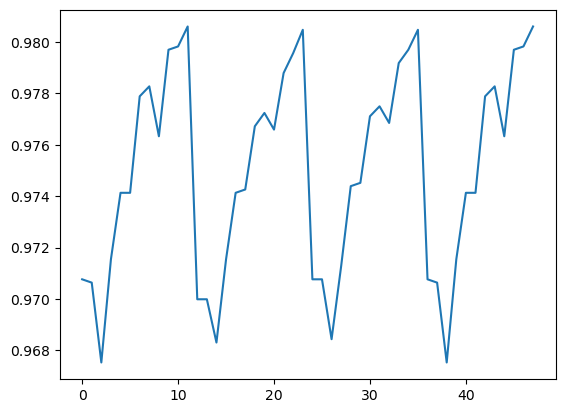

In [34]:
plt.plot(knn_scores.index, knn_scores.mean_test_score)

In [35]:
knn_gs.best_params_, knn_gs.best_score_

({'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'},
 0.9805980109229481)

In [36]:
confusion_matrix(y_true=y_test, y_pred=knn_gs.best_estimator_.predict(X_test))

array([[505,  11,   4,   0],
       [  6, 750,   0,   0],
       [ 16,   0, 586,   0],
       [  0,   6,   0,  49]], dtype=int64)

#### Random Forest model with Hyperparameter tuning

In [37]:
RR_N_Estimators = [10, 30, 50, 70, 100]
RR_Criterion = ['gini', 'entropy', 'log_loss']

In [39]:
rr =RandomForestClassifier()


rr_gs = GridSearchCV(rr, {
    'n_estimators': RR_N_Estimators,
    'criterion': RR_Criterion
}, cv=5, return_train_score=False)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    rr_gs.fit(X_train, y_train)
    rr_scores = pd.DataFrame(rr_gs.cv_results_)

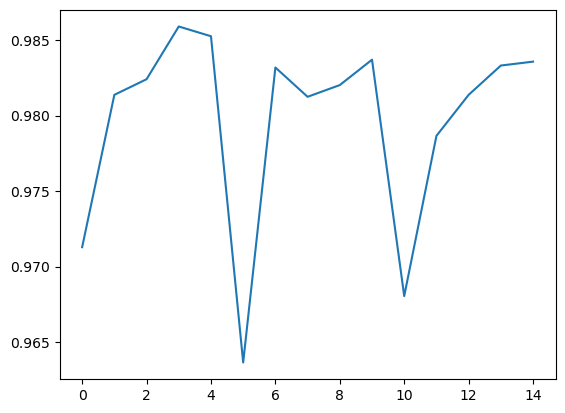

In [40]:
plt.plot(rr_scores.index, rr_scores.mean_test_score)